## Multi-armed bandit experiments

## The Multi-Armed Bandit Problem


#### Suppose you are faced with N slot machines (colourfully called multi-armed bandits). Each bandit has an unknown probability of distributing a prize (assume for now the prizes are the same for each bandit, only the probabilities differ). Some bandits are very generous, others not so much. Of course, you don't know what these probabilities are. By only choosing one bandit per round, our task is devise a strategy to maximize our winnings.

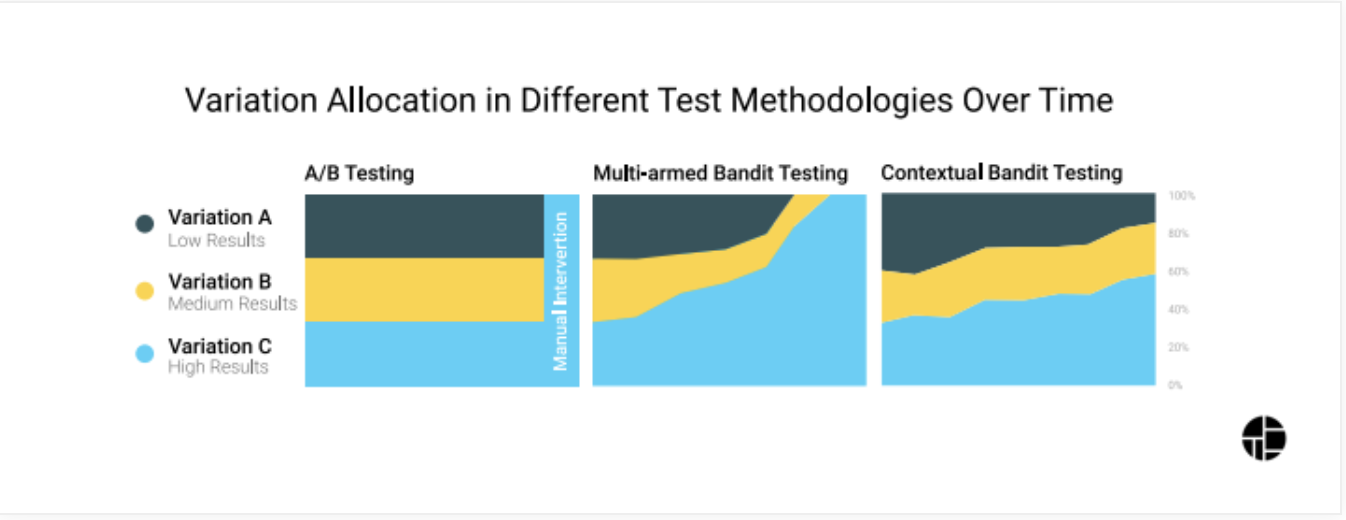

There are 2 main types of Bandit Testing. <br>
1) Multi-armed Bandit Testing <br>
2) Contextual Bandit Testing <br>


Multi-armed bandits allow you to dynamically allocate traffic to variations that are performing well while allocating less and less traffic to underperforming variations. Multi-armed bandits are known to produce faster results since there’s no need to wait for a single winning variation.

Contextual bandit algorithms change the population exposed to each variation to maximize variation performance, so there isn’t a single winning variation. Similarly, there isn’t even a single losing variation.

### Here is the algorithm of a Bayesian Bandit

For each round,
1. Sample a random variable Xb from the prior of bandit b, for all b.
2. Select the bandit with largest sample, i.e. select bandit $B=argmax X_b$.
3. Observe the result of pulling bandit B, and update your prior on bandit B.
4. Return to 1.

### Takeaway:

The concept behind the algorithm is that we don't discard the losers. Instead we should pick them at a decreasing rate such that we rely on the algorithm to gradually find the winner. The steps is to allow that non-zero chance event to exist, which is to say that there is a chance that the losers (bandits) will achieve the status of B. Even tho' we knew the probability of such event happening decreases as we do more pulls (or rounds).

In [15]:
# updated to use pymc3 and Beta instead of rbeta
from pymc3 import Beta
import numpy as np

rand = np.random.rand

class Bandits(object):
    """
    This class represents N bandits machines.
    parameters:
        p_array: a (n,) Numpy array of probabilities >0, <1.
    methods:
        pull( i ): return the results, 0 or 1, of pulling 
                   the ith bandit.
    """
    def __init__(self, p_array):
        self.p = p_array
        self.optimal = np.argmax(p_array)
        
    def pull( self, i ):
        #i is which arm to pull
        return rand() < self.p[i]
    
    def __len__(self):
        return len(self.p)

    
class BayesianStrategy( object ):
    """
    Implements a online, learning strategy to solve
    the Multi-Armed Bandit problem.
    
    parameters:
        bandits: a Bandit class with .pull method
    
    methods:
        sample_bandits(n): sample and train on n pulls.
    attributes:
        N: the cumulative number of samples
        choices: the historical choices as a (N,) array
        bb_score: the historical score as a (N,) array
    """
    
    def __init__(self, bandits):
        
        self.bandits = bandits
        n_bandits = len( self.bandits )
        self.wins = np.zeros( n_bandits )
        self.trials = np.zeros(n_bandits )
        self.N = 0
        self.choices = []
        self.bb_score = []

    
    def sample_bandits( self, n=1 ):
        
        bb_score = np.zeros( n )
        choices = np.zeros( n )
        
        for k in range(n):
            #sample from the bandits's priors, and select the largest sample
            choice = np.argmax( Beta( 1 + self.wins, 1 + self.trials - self.wins) )
            
            #sample the chosen bandit
            result = self.bandits.pull( choice )
            
            #update priors and score
            self.wins[ choice ] += result
            self.trials[ choice ] += 1
            bb_score[ k ] = result 
            self.N += 1
            choices[ k ] = choice
            
        self.bb_score = np.r_[ self.bb_score, bb_score ]
        self.choices = np.r_[ self.choices, choices ]
        return 

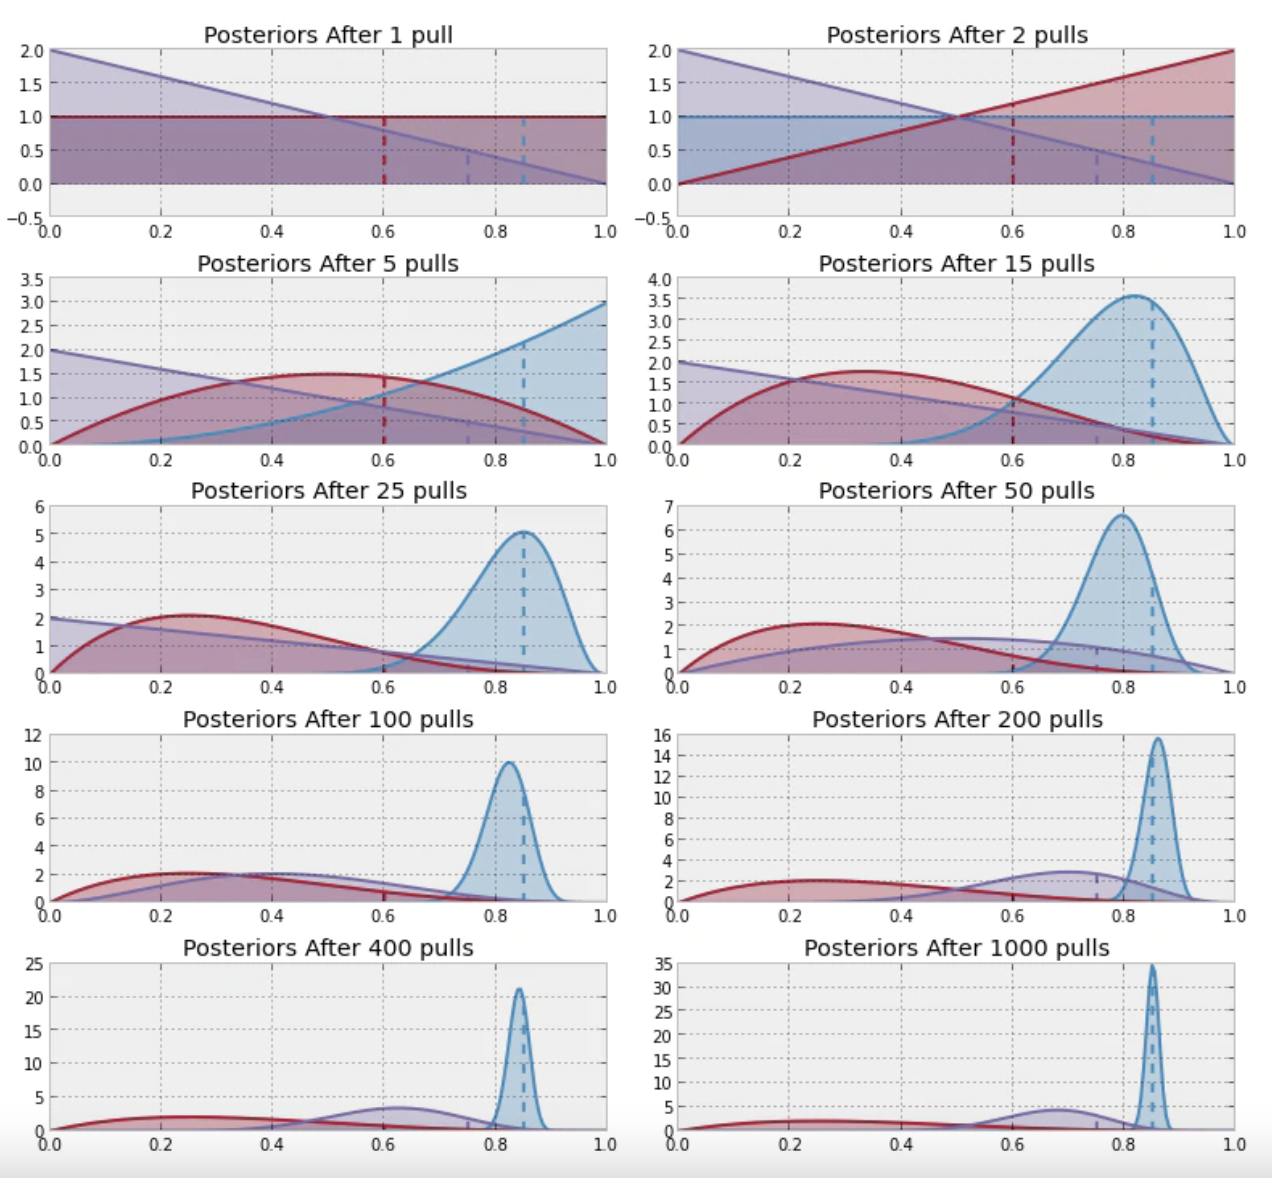

Above you see the visualization of results of the python program above. The dashed lines represent the true probabilities. Realize that there is a clear winner in the blue (over violet or roses red) after just 1000 pulls

The concepts of postetiors had been discussed in previous blogs. I am not going to repeat here. 

If you want to continue on this reading, please go to the following  [post](https://dataorigami.net/blogs/napkin-folding/79031811-multi-armed-bandits?comment=120498782264#comments) 
                                                                          to check out the app where you can check out the demo of animations of a bandit test.

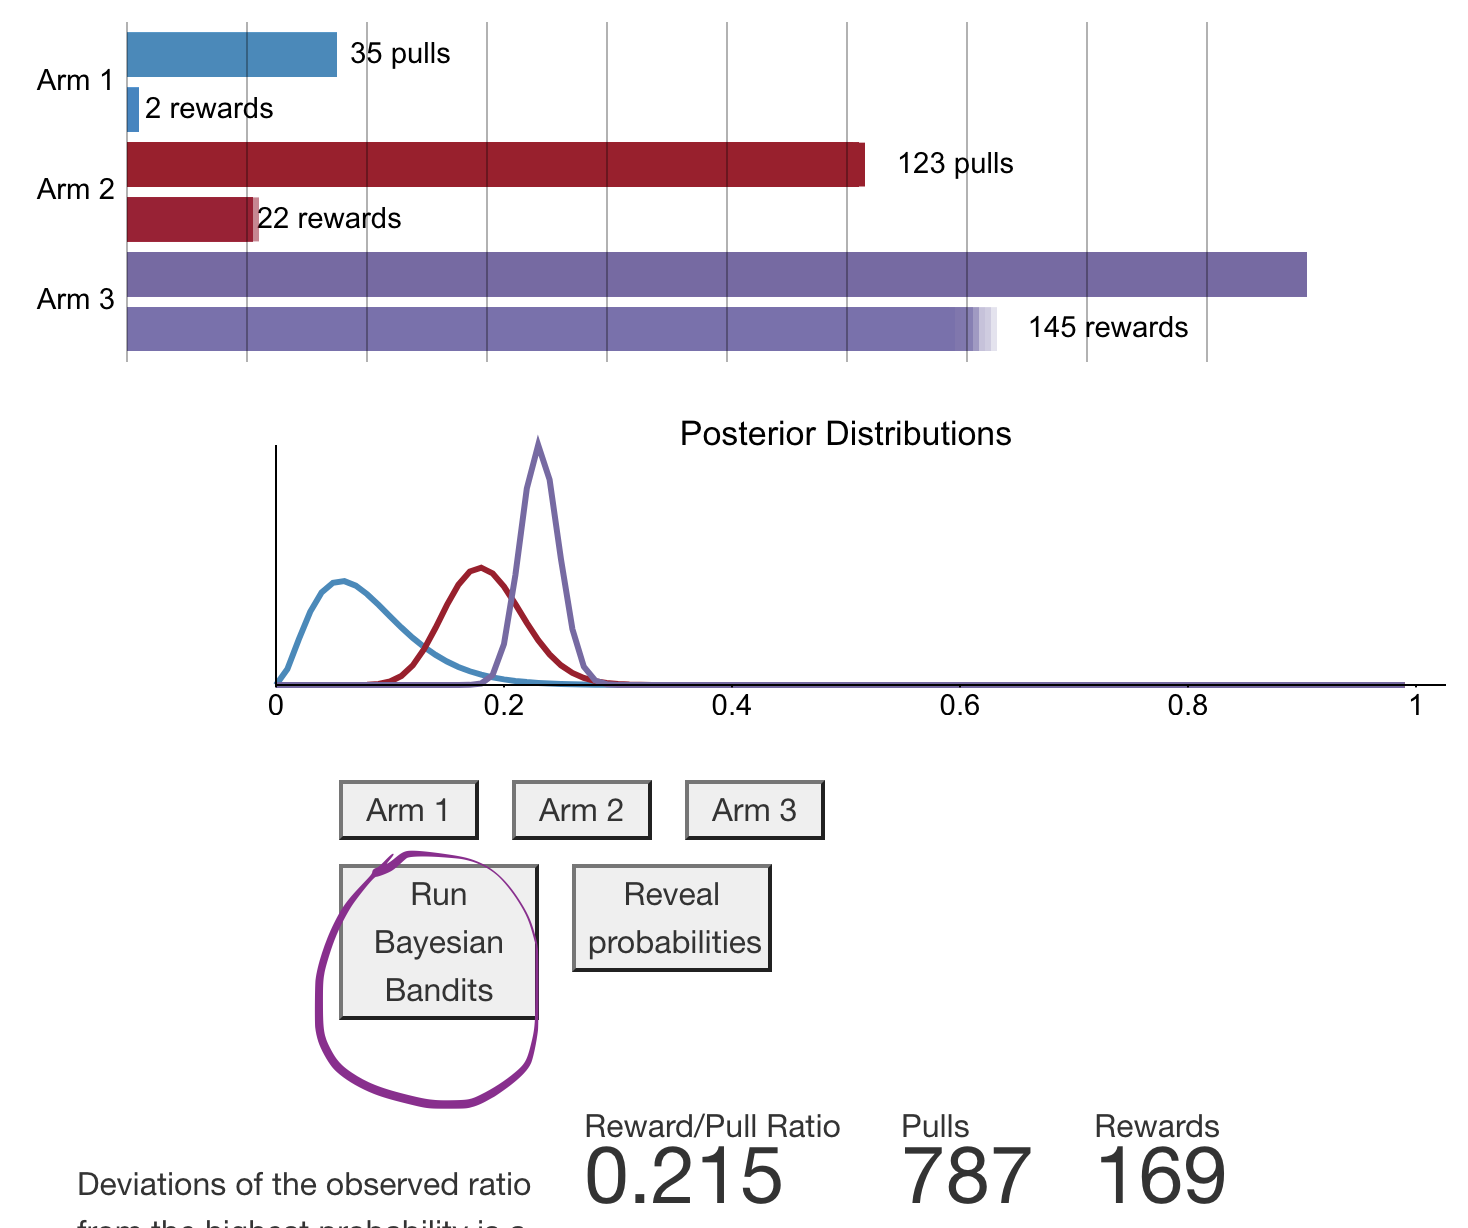

I also learned that there are some other algorithms that are quite popular among ML enthusiasts to implement multi-armed bandits with. They are: <br>
a)  Epsilon-Greedy <br>
b)  UCB1 <br>
c)  UCB1-Tuned <br>
d)  UCB-Normal  <br>

In a nutshell, they are optimized for different rewards with sample data that is of different underlying distributions.

## References: 

1. https://dataorigami.net/blogs/napkin-folding/79031811-multi-armed-bandits
2. https://www.dynamicyield.com/lesson/contextual-bandit-optimization/
3. https://towardsdatascience.com/multi-armed-bandits-upper-confidence-bound-algorithms-with-python-code-a977728f0e2d